In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
# [].to_csv()
#_변수이름 = pd.read_csv("_경로 파일명",_)
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
sub = pd.read_csv("../input/titanic/gender_submission.csv")

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

* 파일명.shape() : 데이터 df의 (행, 열) 크기를 출력합니다

In [5]:
train.head()
test.tail()
sub.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


* 파일명.head()     : 앞부분 데이터 확인
* 파일명.tail()     : 뒷부분 데이터 확인
* 파일명.describe() : 요약 통계량을 출력


In [6]:
print(train.columns)
print(test.columns)
print(sub.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


##### 알 수있는 정보
* train에는 Survived가 있고, test에는 없다.

In [7]:
train.describe() # 12 개의 columns중 수치형 값 7개 columns만 표시됨. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* obj 정보는 describe()에서 표시가 안됨 (이유 : obj 정보는 수치값이 아니어서 (문자열))


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 알 수 있는 정보
* 나이를 알 수없는 인원 수 : 891 - 714 = 177명

In [9]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* obj정보를 describe()으로 보고싶을 때, 매개변수에 include = 'O' 추가

## Pandas(판다스)로 데이터 핸들링 : info(), describe(), value_counts(), head(), tail(), ...
* describe()  : 컬럼별 숫자형 데이터 값의 n-percentile분포도, 평균값, 최댓값, 최솟값을 나타냅니다
* info()      : 통 데이터 건수와 데이터 타입, Null건수를  알 수 있습니다.

In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


* 비어있으면 true, 값이 있으면 False

<AxesSubplot:>

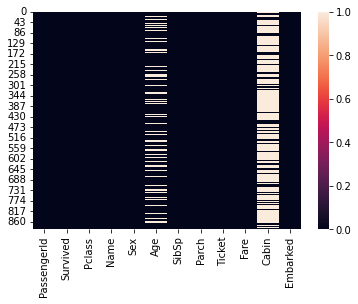

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 1) 생존자에 대한 정보

<AxesSubplot:xlabel='Survived', ylabel='count'>

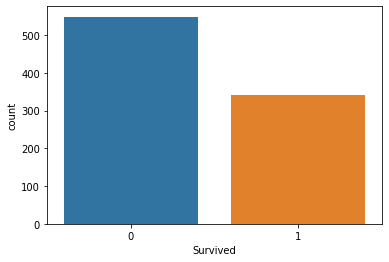

In [13]:
sns.countplot(x='Survived', data = train)

#### 1) 알 수있는 정보
* 0 : 사망자, 1 : 생존자
* 사망자가 500명이상이다. 생존자가 330~360명 사이이다.

### 2) pclass(등석별) 생존자


<AxesSubplot:xlabel='Pclass', ylabel='count'>

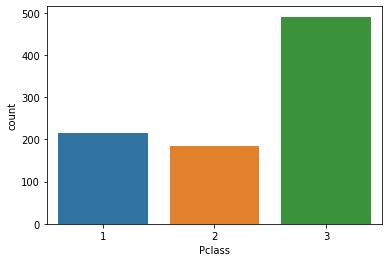

In [14]:
sns.countplot(x='Pclass', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

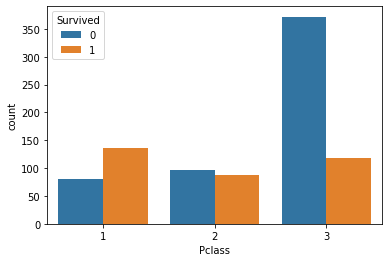

In [15]:
sns.countplot(x='Pclass', hue="Survived", data = train)

#### 2) 알 수있는 정보
* 3등급 승객은 생존자에 비해 많은 사람이 사망했다. (3배이상)
* 의문) 왜 3등급 승객들만 생존자에 비해 많이 사망하였는가?

### 3) sex(성별) 생존자

<AxesSubplot:xlabel='Sex', ylabel='count'>

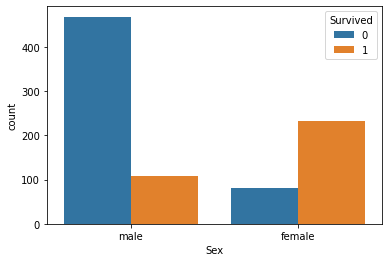

In [16]:
sns.countplot(x='Sex', hue="Survived", data=train)

#### 3) 알 수있는 정보
* 남성 사망자는 생존자에 비해 4배이상 많다.
* 여성 사망자는 생존자보다 2배이상 적다.
* 남성의 사망자가 여성의 사망자의 4배 이상이다.
* 여성의 생존자가 남성의 생존자의 2배 이상이다
* 의문) 왜 남성이 여성보다 생존자 대비 사망자의 비율이 높은가?
* 2차 분석) 남성 탑승객이 여성 탑승객 보다 많다.

### 4) Age(나이별) 생존자

<AxesSubplot:xlabel='Age', ylabel='count'>

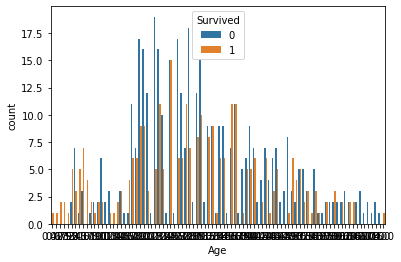

In [17]:
 # x축에는 수치형을 넣지 않는다.
sns.countplot(x='Age', hue="Survived", data=train)

#### 4) 알 수 있는 정보
* 

<AxesSubplot:xlabel='Age', ylabel='Count'>

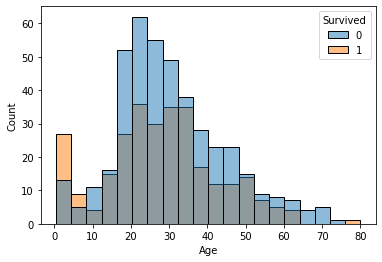

In [18]:
# histogram : x축에 수치형 변수
sns.histplot(x='Age',hue='Survived', data=train)
# 회색 : 겹쳐진 부분

### 5) 등급별 데이터를 뽑고, 등급별로 나이에 따른 histogram그리기

In [19]:
train_p1 = train[train['Pclass']==1] # 데이터에서 Pclass가 1인 값 가져오기
train_p2 = train[train['Pclass']==2] # 데이터에서 Pclass가 2인 값 가져오기
train_p3 = train[train['Pclass']==3] # 데이터에서 3등급 좌석인 탑승객 정보 가져오기

### 5-1) 1등급 탑승객의 나이에 따른 histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

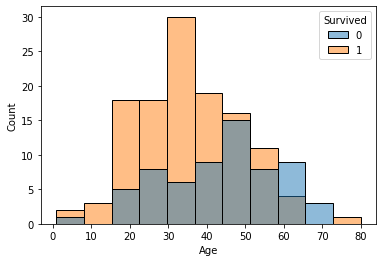

In [20]:
sns.histplot(x='Age',hue='Survived', data=train_p1)

### 5-2) 2등급 탑승객의 나이에 따른 histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

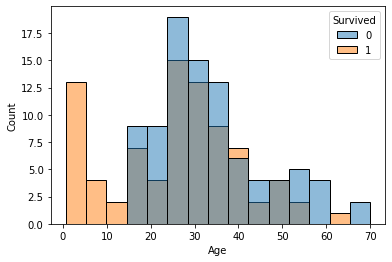

In [21]:
sns.histplot(x='Age',hue='Survived', data=train_p2)

### 5-3) 3등급 탑승객의 나이에 따른 histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

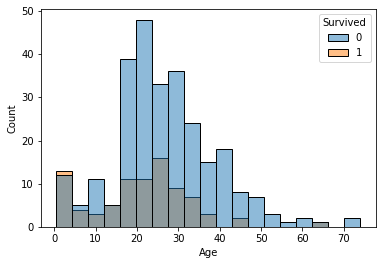

In [22]:
sns.histplot(x='Age',hue='Survived', data=train_p3)

#### 5) 알 수있는 정보
* 좌석의 등급이 높을수록 상대적으로 생존률이 높았다.
* 어린 아이들은 등석과 상관없이 생존률이 높았다.

### 6) 성별 데이터를 뽑고, 성별 나이에 따른 histogram그리기

In [23]:
train_male = train[train['Sex']=='male']
train_female = train[train['Sex']=='female']

<AxesSubplot:xlabel='Age', ylabel='Count'>

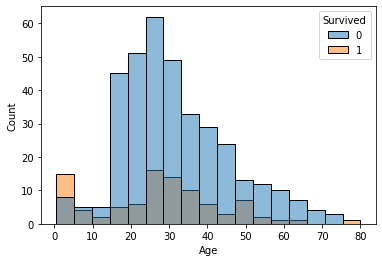

In [24]:
sns.histplot(x='Age',hue='Survived', data=train_male)

<AxesSubplot:xlabel='Age', ylabel='Count'>

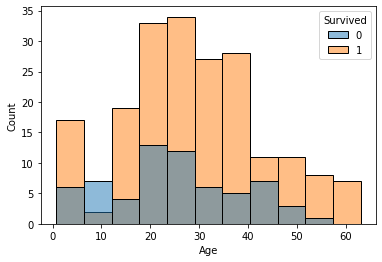

In [25]:
sns.histplot(x='Age',hue='Survived', data=train_female)

#### <정리>
* sns.countplot     : x축 존재, y : 데이터 개수
* sns.boxplot       : 박스플롯,최댓값, 최솟값, 중앙값, 이상치, 25%, 75%
* sns.lmplot(x='수치형X',y='',data= )
* sns.lmplot(x='수치형X',y='',hue='수치형X'data= )
* sns.pairplot()    : 그래프 여러개(하나의 변수와 다른 변수의 상관관계 보기)
* sns.heatmap()     : 밝기를 통해 
* sns.hisplot(x='수치형O', data=)     : 히스토그램(수치형 컬럼에 대한 분포,)
* sns.hisplot(x='수치형O', hue='수치형, data=)
* sns.barplot()     : 막대 그래프
        
        

### 7) Embarked의 영향

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

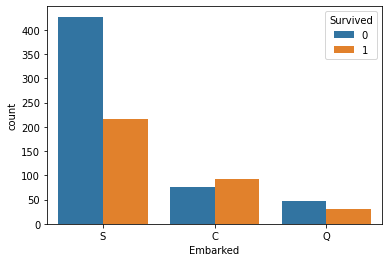

In [27]:
sns.countplot(x="Embarked", hue="Survived", data = train)

#### 7) 알 수 있는 정보
* S 항구에서 가장 많은 사람이 탑승했다.
* S 항구에서 승선한 생존자가 가장 많다.
    * C 항구의 사망자 대비 생존자가 많다. 이유는?
* Q 항구에서 승선인원이 가장 적다.

### 8) C 항구의 사망자 대비 생존자가 가장 높은 이유


<AxesSubplot:xlabel='Embarked', ylabel='count'>

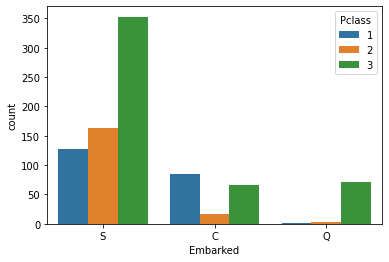

In [28]:
sns.countplot(x='Embarked',hue='Pclass',data=train)

#### 8) 알수있는 정보
* C항구에서 탑승한 승객은 상대적으로 구조에서 우선순위대상이었던 1등급석 탑승객 비율이 가장 많았기 때문.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

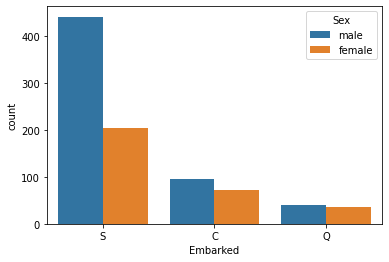

In [29]:
sns.countplot(x='Embarked',hue='Sex',data=train)

### 9) Fare에 대해 분석해 보기
(항구별 티켓 가격 비교, 비교대상 : 1등석,2등석,3등석)


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

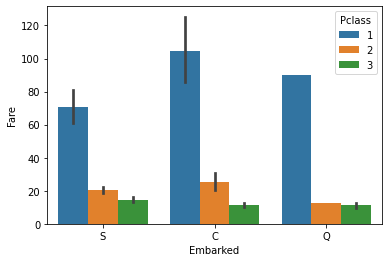

In [30]:
sns.barplot(x= 'Embarked', y ='Fare', hue='Pclass',data=train)

#### 9) 알수있는 정보
* 각 항구별 1등석의 티켓 가격을 비교했을 때, C항구 탑승객의 티켓 값이 가장 비싸다.
* 각 항구별 3등석의 티켓 가격을 비교했을 때, 항구별 차이가 가장 작다.

### 10) Fare-Age에 대해 알아보기

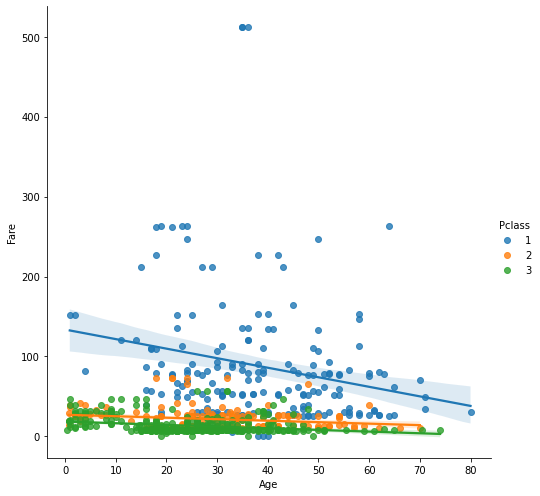

In [34]:
sns.lmplot(x="Age", y="Fare",data=train, hue="Pclass", height = 7)

#### 10) 알 수 있는 정보
* 나이가 많을 수록 요금은 작아지는 경향
* 나이별 요금 변동 변화율은 1등석일 때 가장 크다.
* 즉, 고령일 수록 1등석을 타는 것이 합리적이다.

### 11) .subplot()

In [69]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='count'>

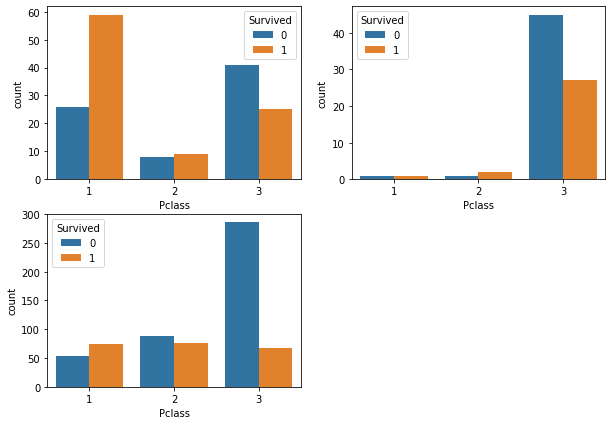

In [70]:
train_S = train[train['Embarked']=='S']   # 데이터에서 Embarked:S만 가져오기
train_C = train[train['Embarked']=='C']   # 데이터에서 Embarked:C만 가져오기
train_Q = train[train['Embarked']=='Q']   # 데이터에서 Embarked:Q만 가져오기

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)